In [2]:
import pandas as pd
import glob

# Define the path to the directory containing the Parquet files
parquet_dir = 'C:\\Users\\mafer\\FinTech-Workspace\\FinTechProject2\\Resources'

# ...

# Define the path and filename for the combined CSV file
csv_file = 'C:\\Users\\mafer\\FinTech-Workspace\\FinTechProject2\\file.csv'


# Get a list of all Parquet files in the directory
parquet_files = glob.glob(parquet_dir + '/*.parquet')

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Iterate over each Parquet file
for file in parquet_files:
    # Read the Parquet file into a DataFrame
    df = pd.read_parquet(file)
    
    # Append the data to the combined DataFrame
    combined_df = combined_df.append(df, ignore_index=True)

# Save the combined DataFrame as a CSV file
combined_df.to_csv(csv_file, index=False)


C:\Users\mafer\AppData\Local\Temp\ipykernel_29264\615828097.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\mafer\AppData\Local\Temp\ipykernel_29264\615828097.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\mafer\AppData\Local\Temp\ipykernel_29264\615828097.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
C:\Users\mafer\AppData\Local\Temp\ipykernel_29264\615828097.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_d

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

## Split the Data into Training and Testing Sets

In [27]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Set the file path
file_path = Path("file.csv")

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,NaN,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,NaN,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,NaN,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,NaN,0.3,31.26,1.0,1.0,2.75


In [28]:
data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,840402.000000,750062.000000,840402.000000,840402.000000,750062.000000,840402.000000,840402.000000,840402.000000,840402.000000,840402.000000,840402.000000,0.0,840402.000000,840402.000000,750062.000000,750047.000000,750062.000000
mean,1.858036,1.224952,99.802516,138.512521,1.287703,84.454130,15.294517,0.368788,0.425450,2.005268,0.248204,NaN,0.320029,19.322237,1.373006,1.047505,0.738456
std,0.349157,1.007635,63.640210,76.908870,0.923323,3244.597234,15.180127,0.692792,0.199584,3.179140,1.355336,NaN,0.130078,16.998819,0.504560,0.212717,1.219011
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-350.080000,-7.500000,-0.500000,-14.300000,-6.550000,NaN,-1.000000,-350.380000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,65.000000,74.000000,1.000000,1.150000,7.500000,0.000000,0.500000,0.000000,0.000000,NaN,0.300000,10.260000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,2.020000,11.330000,0.000000,0.500000,1.450000,0.000000,NaN,0.300000,15.050000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,130.000000,219.000000,1.000000,3.770000,18.000000,0.500000,0.500000,3.000000,0.000000,NaN,0.300000,22.860000,2.000000,1.000000,2.750000
max,5.000000,99.000000,265.000000,265.000000,9.000000,360068.140000,2020.200000,7.500000,3.550000,450.000000,77.000000,NaN,1.000000,2021.000000,5.000000,2.000000,2.750000


## Calculate the amount of trips per month


In [5]:
# Convert the "lpep_pickup_datetime" column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract the month from the pickup datetime and count the trips for each month
trips_per_month = data['lpep_pickup_datetime'].dt.month.value_counts().sort_index()

# Display the trips per month
print(trips_per_month)

1     62516
2     69399
3     78519
4     76119
5     76908
6     73709
7     64204
8     65926
9     69025
10    69325
11    62309
12    72443
Name: lpep_pickup_datetime, dtype: int64


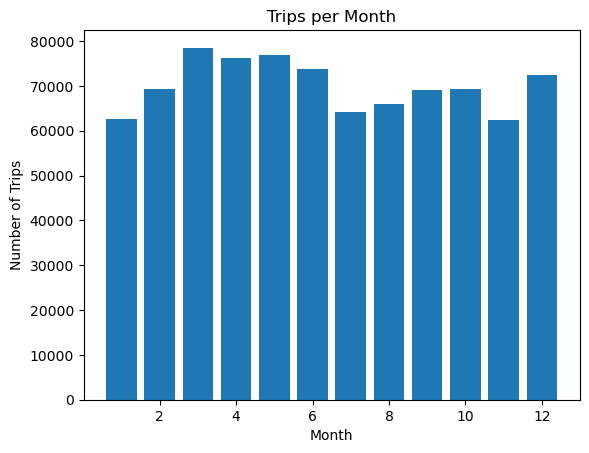

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

# Convert the "lpep_pickup_datetime" column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract the month from the pickup datetime and count the trips for each month
trips_per_month = data['lpep_pickup_datetime'].dt.month.value_counts().sort_index()

# Sort the values in ascending order
trips_per_month = trips_per_month.sort_values(ascending=True)

# Create a bar plot for trips per month with ascending bars
plt.bar(trips_per_month.index, trips_per_month.values)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips per Month')

# Display the plot
plt.show()

# Save the plot as a PNG image
plt.savefig('visualization5.png', dpi=300)

## Calculate the ammount of trips per vendor per month 

In [7]:
# Convert the "lpep_pickup_datetime" column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract the month and vendor from the pickup datetime
data['month'] = data['lpep_pickup_datetime'].dt.month
trips_per_month_vendor = data.groupby(['month', 'VendorID']).size().unstack(fill_value=0)

# Display the trips per vendor per month
print(trips_per_month_vendor)

VendorID      1      2  5
month                    
1          9405  53111  0
2         10374  59025  0
3         11545  66973  1
4         10477  65642  0
5         10723  66185  0
6         10561  63148  0
7          9866  54338  0
8         10122  55799  5
9          9888  59136  1
10         9490  59835  0
11         6881  55428  0
12         9996  62447  0


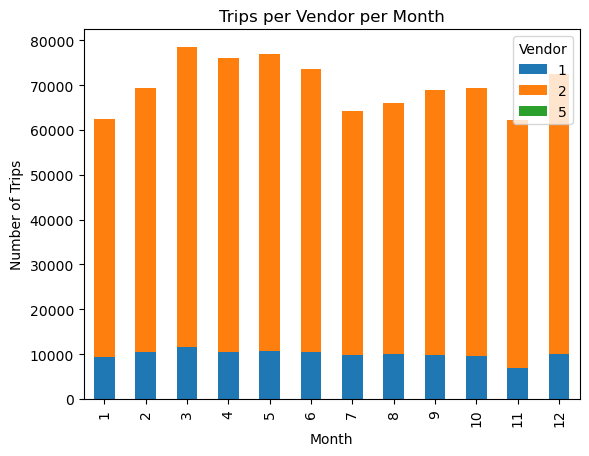

<Figure size 640x480 with 0 Axes>

In [65]:
# Convert the "lpep_pickup_datetime" column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract the month and vendor from the pickup datetime
data['month'] = data['lpep_pickup_datetime'].dt.month
trips_per_month_vendor = data.groupby(['month', 'VendorID']).size().unstack(fill_value=0)

# Create a stacked bar plot
trips_per_month_vendor.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips per Vendor per Month')

# Add a legend
plt.legend(title='Vendor')

# Display the plot
plt.show()

plt.savefig('visualization4.png', dpi=300)

## Lets review the average distance per month for the green cab 


In [24]:

# Convert the "lpep_pickup_datetime" column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Extract the month from the pickup datetime and calculate the average distance for each month
avg_distance_per_month = data.groupby(data['lpep_pickup_datetime'].dt.month)['trip_distance'].mean()

# Display the average distance for trips for each month
print(avg_distance_per_month)


lpep_pickup_datetime
1     4.543399
2     3.460409
3     3.709860
4     3.025499
5     3.118548
6     4.655269
7     3.233116
8     5.364589
9     3.314011
10    3.096925
11    3.007569
12    2.958230
Name: trip_distance, dtype: float64


In [37]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Read the data into a pandas DataFrame
data = pd.read_csv('file.csv')

# Group the data by pickup location and count the occurrences
pickup_counts = data['PULocationID'].value_counts()

# Convert the pickup counts to a DataFrame
pickup_counts_df = pd.DataFrame({'LocationID': pickup_counts.index, 'PickupCount': pickup_counts.values})

# Create a map centered at a specific location
map_center = [40.7128, -74.0060]  # Example: New York City coordinates
m = folium.Map(location=map_center, zoom_start=12)

# Iterate over the pickup locations and add circle markers to the map
for index, row in pickup_counts_df.iterrows():
    location = [data.loc[data['PULocationID'] == row['LocationID'], 'PULocationID'].iloc[0],
                data.loc[data['PULocationID'] == row['LocationID'], 'DOLocationID'].iloc[0]]
    radius = row['PickupCount'] / 1000  # Adjust the radius based on the pickup count
    folium.CircleMarker(location, radius=radius, color='blue', fill=True, fill_color='blue').add_to(m)

m



## Create a cluster for each pick up location and drop off location per month for the green cab 


In [36]:
import pandas as pd
from sklearn.cluster import KMeans

# Read the data into a pandas DataFrame
data = pd.read_csv('file.csv')

# Select the features for clustering
X = data[['PULocationID', 'DOLocationID']]

# Create a K-means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
data['ClusterLabel'] = cluster_labels

# Print the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)


Cluster Centers:
[[ 67.91911998  57.50275468]
 [ 67.08547482 239.51585487]
 [201.91211644  83.24678357]
 [ 72.8650535  147.49996314]
 [199.13204687 212.05092532]]


C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


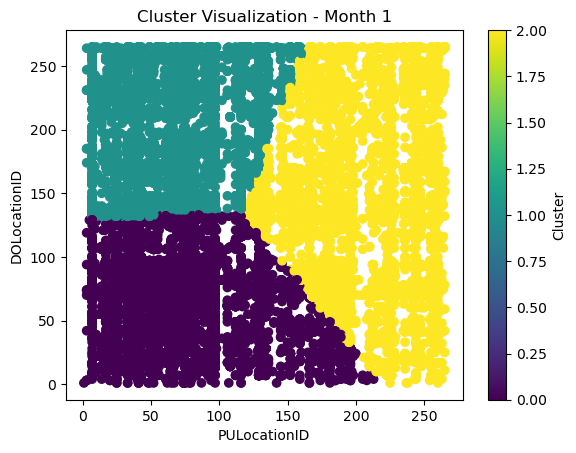

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


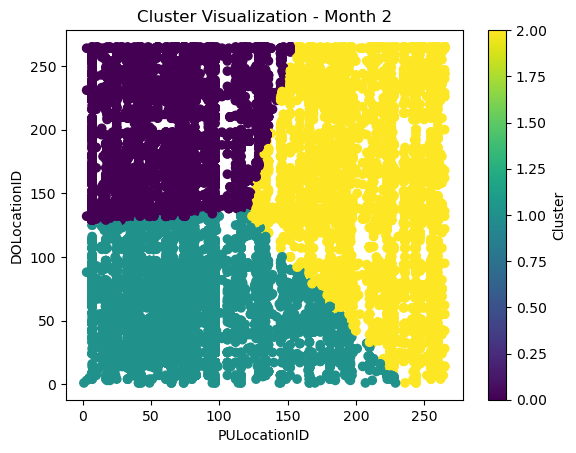

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


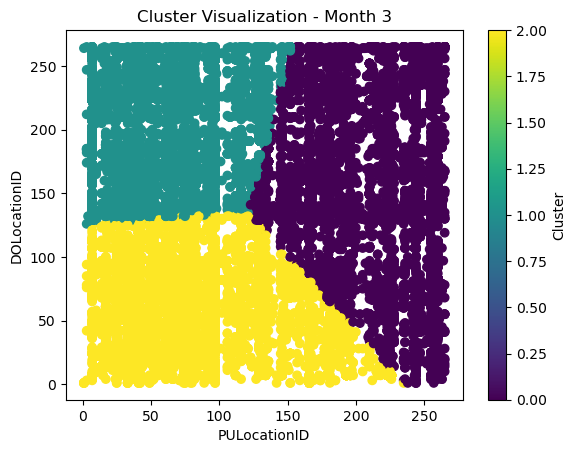

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


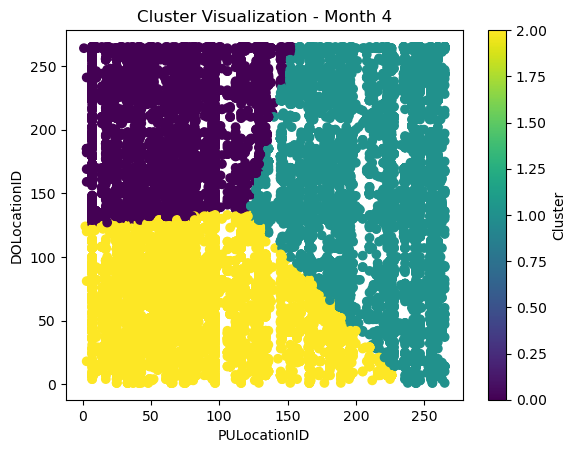

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


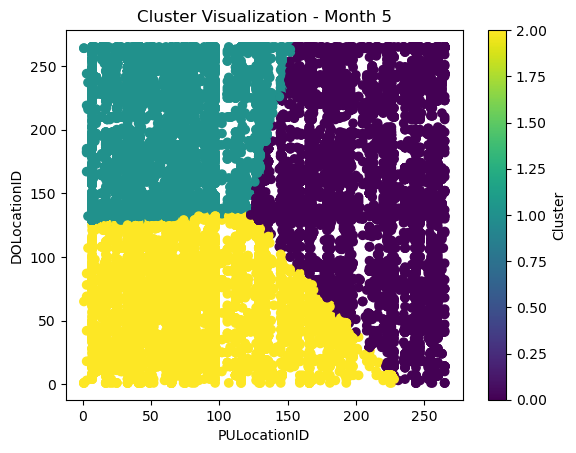

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


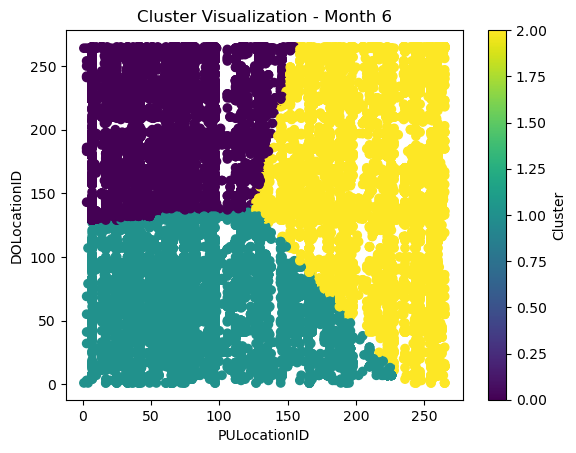

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


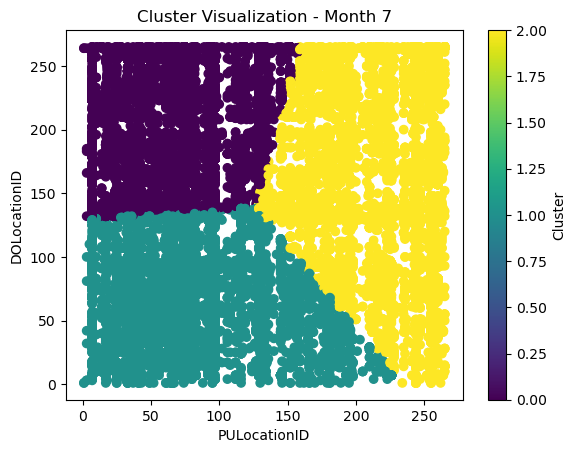

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


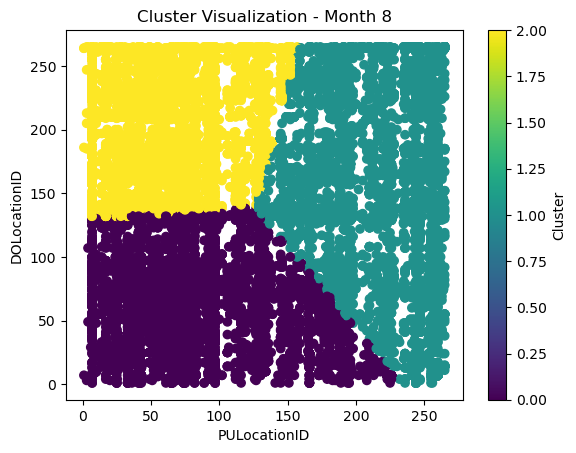

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


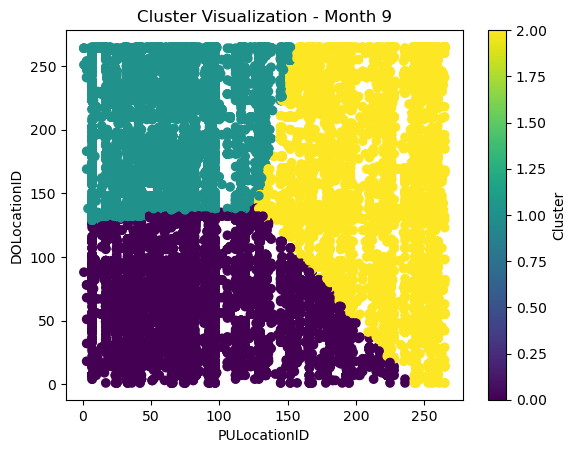

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


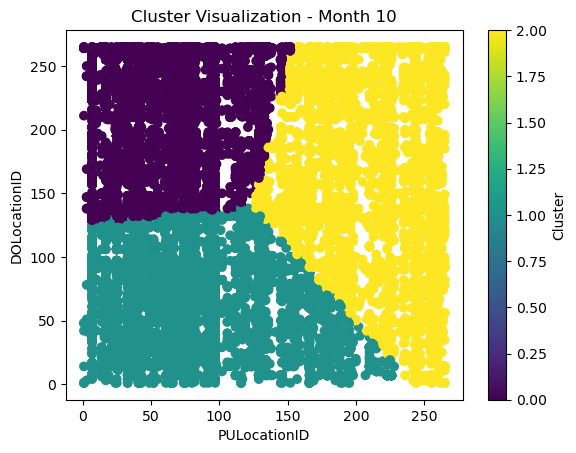

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


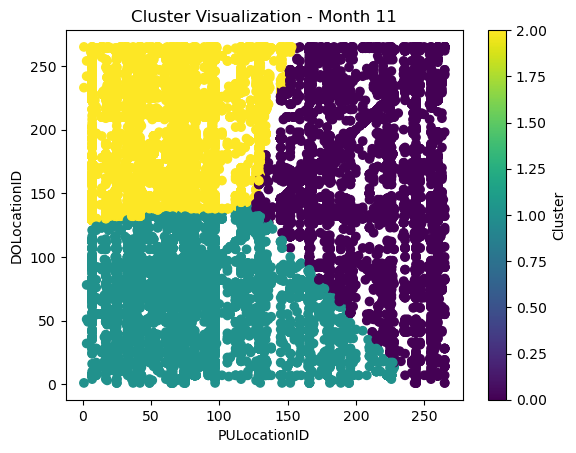

C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\2217686313.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['ClusterLabel'] = labels


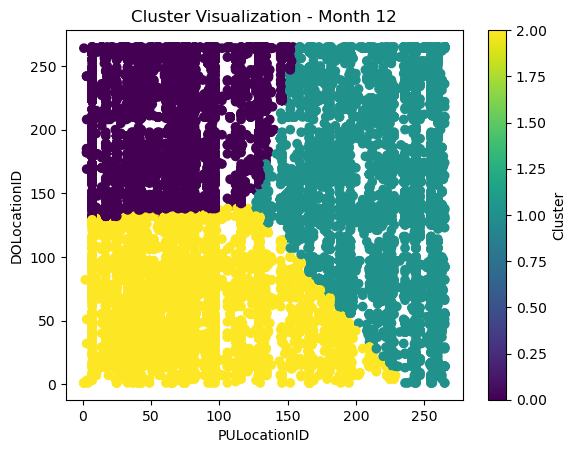

In [39]:

# Convert 'lpep_pickup_datetime' column to datetime format
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])

# Iterate over each month
for month in range(1, 13):
    # Filter the data for the specific month
    month_data = data[data['lpep_pickup_datetime'].dt.month == month]
    
    # Select the features for clustering
    X = month_data[['PULocationID', 'DOLocationID']]
    
    # Create a K-means clustering model
    kmeans = KMeans(n_clusters=3)  # Specify the number of clusters as desired
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Assign cluster labels to the data points
    labels = kmeans.labels_
    
    # Add the cluster labels as a new column in the DataFrame
    month_data['ClusterLabel'] = labels
    
    # Create a scatter plot of the clusters
    plt.scatter(month_data['PULocationID'], month_data['DOLocationID'], c=month_data['ClusterLabel'], cmap='viridis')
    plt.xlabel('PULocationID')
    plt.ylabel('DOLocationID')
    plt.title(f'Cluster Visualization - Month {month}')
    plt.colorbar(label='Cluster')
    plt.show()


## Calculate the amount of tips per trips per month

In [40]:
# Group the data by month and count the number of trips with tips
trips_with_tips_by_month = data[data['tip_amount'] > 0].groupby(data['lpep_pickup_datetime'].dt.month)['tip_amount'].count()

# Display the number of trips with tips for each month
print("Number of trips with tips for each month:")
print(trips_with_tips_by_month)


Number of trips with tips for each month:
lpep_pickup_datetime
1     33557
2     38670
3     44198
4     44350
5     45168
6     43221
7     36843
8     37657
9     41053
10    42040
11    38166
12    42160
Name: tip_amount, dtype: int64


## For the month of January lets analyse at what time do the taxi drivers receive more tip and  how much of tip 

In [42]:
january_data = data[data['lpep_pickup_datetime'].dt.month == 1]


In [43]:
january_data['pickup_hour'] = january_data['lpep_pickup_datetime'].dt.hour


C:\Users\mafer\AppData\Local\Temp\ipykernel_31412\109058851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_data['pickup_hour'] = january_data['lpep_pickup_datetime'].dt.hour


In [44]:
hourly_tips = january_data.groupby('pickup_hour')['tip_amount'].mean()


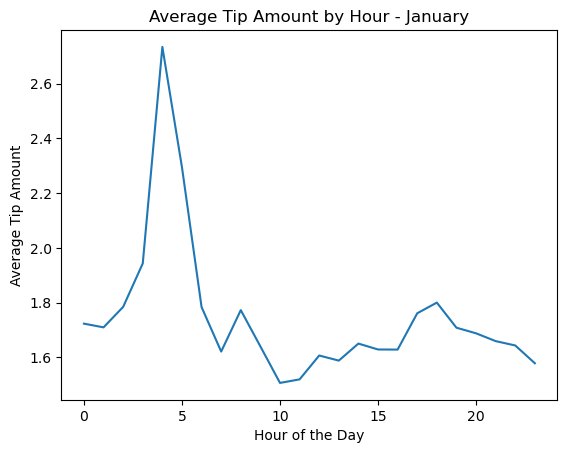

<Figure size 640x480 with 0 Axes>

In [64]:


plt.plot(hourly_tips.index, hourly_tips.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Hour - January')
plt.show()

plt.savefig('visualization3.png', dpi=300)


## Create a PCA analysis
### Lets take into consideration the trip distance, the fare amount and the tip for the trips. to examine if the distance has significant impact on the variance in the data 


In [54]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select the relevant features from your data
features = ['trip_distance', 'fare_amount', 'tip_amount']

# Create a subset of your data with the relevant features
data_subset = data[features]

# Standardize the data by scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_subset)

# Create a PCA model with the desired number of components
n_components = 2  # Choose the desired number of components
pca = PCA(n_components=n_components)

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Get the transformed data with reduced dimensionality
transformed_data = pca.transform(scaled_data)

# Create a DataFrame with the transformed data
transformed_df = pd.DataFrame(transformed_data, columns=['PC1', 'PC2'])

# Append the original target variable (e.g., tip amount) to the transformed DataFrame
transformed_df['tip_amount'] = data['tip_amount']

# View the transformed DataFrame
print(transformed_df.head())


        PC1       PC2  tip_amount
0 -0.994890  0.041472        0.00
1 -0.716026  0.022491        0.00
2  0.537258 -0.059764        4.60
3 -0.785742  0.027238        0.00
4  1.021227 -0.092161        5.21


### After determine PCA it is good to perform a correlation matrix 
#### With the interpretation of If the correlation coefficient between trip distance and fare amount is close to 1, it indicates a strong positive correlation, suggesting that longer trips tend to have higher fare amounts. If the correlation coefficient between trip distance and tip amount is close to 1, it indicates a strong positive correlation, suggesting that longer trips tend to have higher tip amounts. If the correlation coefficient between fare amount and tip amount is close to 1, it indicates a strong positive correlation, suggesting that higher fare amounts tend to result in higher tip amounts.

In [55]:


# Create a subset of the data with the relevant columns
subset_data = data[['trip_distance', 'fare_amount', 'tip_amount']]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Print the correlation matrix
print(correlation_matrix)


               trip_distance  fare_amount  tip_amount
trip_distance       1.000000     0.013143    0.014093
fare_amount         0.013143     1.000000    0.283911
tip_amount          0.014093     0.283911    1.000000


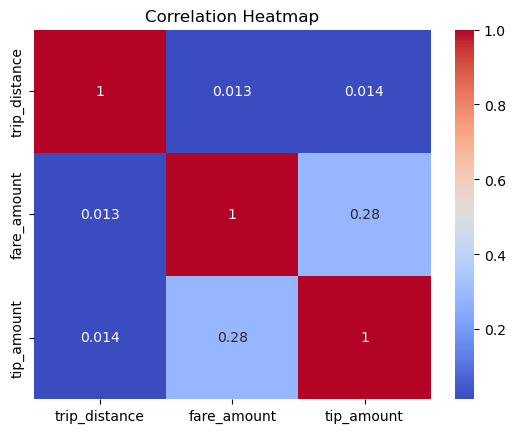

<Figure size 640x480 with 0 Axes>

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subset of the data with the relevant columns
subset_data = data[['trip_distance', 'fare_amount', 'tip_amount']]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

plt.savefig('visualization2.png', dpi=300)


### Continuing with the PCA  model lets create an outlier detection with the components (Tip amount, distance and fare amount) In order to identify outliers in terms that there might by an undercharge. In the same way, it can provide valuable insights to unsual or exceptional trips that deviate from general patterns.

In [57]:

# Calculate the z-scores for each numerical column
z_scores = (data[['trip_distance', 'fare_amount', 'tip_amount']] - data[['trip_distance', 'fare_amount', 'tip_amount']].mean()) / data[['trip_distance', 'fare_amount', 'tip_amount']].std()

# Define a threshold for outlier detection (e.g., z-score greater than 3)
threshold = 3

# Identify the outliers by checking the z-scores against the threshold
outliers = np.abs(z_scores) > threshold

# Print the number of outliers detected for each column
for column in outliers:
    print(f"Number of outliers in {column}: {outliers[column].sum()}")


Number of outliers in trip_distance: 781
Number of outliers in fare_amount: 10751
Number of outliers in tip_amount: 10491


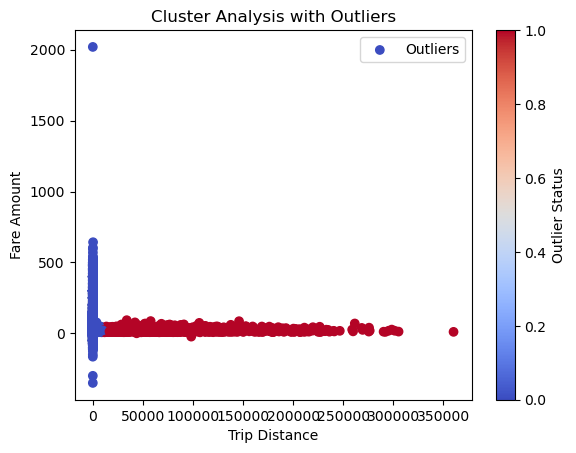

<Figure size 640x480 with 0 Axes>

In [62]:

# Extract the columns of interest for clustering
cluster_data = data[['trip_distance', 'fare_amount', 'tip_amount']]

# Plot the data points
plt.scatter(cluster_data['trip_distance'], cluster_data['fare_amount'], c=outliers['trip_distance'], cmap='coolwarm', label='Outliers')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Cluster Analysis with Outliers')

# Add colorbar and legend
cbar = plt.colorbar()
cbar.set_label('Outlier Status')
plt.legend()

# Display the plot
plt.show()

plt.savefig('visualization.png', dpi=300)


### In this exercise, we analyzed several aspects of the taxi trip data, including trip distance, fare amount, tip amount, correlation analysis, outlier detection, and clustering. Here are the key findings and the importance of each aspect:

 Trip Distance: We observed the distribution and variation of trip distances. This information is crucial for understanding the length of the trips and can help in estimating travel time and resource allocation.

Fare Amount: By analyzing the fare amounts, we gained insights into the pricing structure and fare variations based on the distance traveled. This information is valuable for fare calculations, revenue analysis, and understanding customer spending patterns.

Tip Amount: We explored the tips given by passengers and identified trends and patterns in tipping behavior. This analysis provides insights into customer satisfaction, service quality, and can be used to evaluate the effectiveness of tipping-related strategies.

Correlation Analysis: We performed a correlation analysis to examine the relationships between trip distance, fare amount, and tip amount. This analysis helps understand how these variables are related to each other and identify any potential dependencies or associations.

Outlier Detection: By detecting outliers using z-scores, we identified extreme values in the dataset that deviate significantly from the average. Outliers may indicate unusual or anomalous instances and can provide insights into data quality issues or exceptional cases that require further investigation.

Clustering: Using clustering techniques, we grouped similar data points together based on their trip distance, fare amount, and tip amount. Clustering helps in identifying patterns and segments within the dataset, which can be useful for targeted marketing, service customization, or resource allocation.

Overall, the aspects analyzed in this exercise provide a comprehensive understanding of the taxi trip data. They offer insights into trip characteristics, fare dynamics, tipping behavior, relationships between variables, identification of outliers, and patterns within the dataset. This information can be utilized for various purposes such as optimizing pricing strategies, improving customer satisfaction, identifying areas for improvement, and making data-driven decisions in the taxi service industry.

